<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo4/blob/master/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#instalo la librería fuzzy
pip install scikit-fuzzy


     |████████████████████████████████| 1.0MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/f9/0e/a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


3.727272727272728
3.3667504192892004
1.5
2.0
1.0


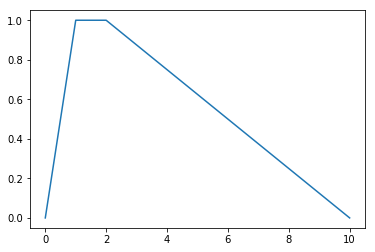

In [0]:
#Importo las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#Creo un conjunto trapezoidal cualquiera
X = np.linspace(0,10,21)
A = fuzz.trapmf(X,[0,1,2,10])
#Grafico el conjunto
plt.plot(X,A)
#Pruebo los métodos de desborrosificación
print(fuzz.defuzz(X,A,'centroid'))
print(fuzz.defuzz(X,A,'bisector'))
print(fuzz.defuzz(X,A,'mom'))
print(fuzz.defuzz(X,A,'lom'))
print(fuzz.defuzz(X,A,'som'))

(501, 201)
(501,)


Text(0, 0.5, 'Valor de mambresía')

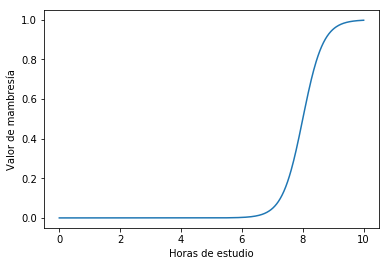

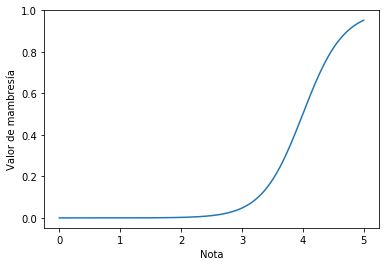

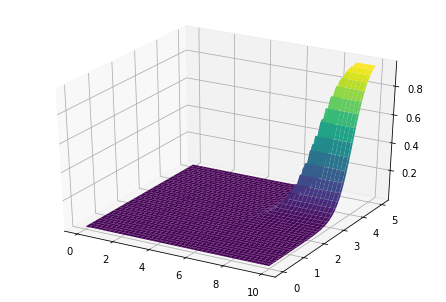

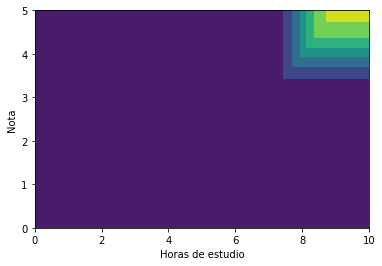

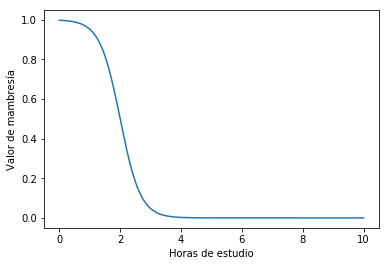

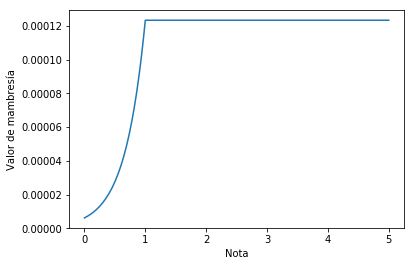

In [0]:
#Conjunto borroso estudiar mucho
X = np.linspace(0,10,501)
A = fuzz.sigmf(X,8,3)

plt.plot(X,A)
plt.xlabel('Horas de estudio')
plt.ylabel('Valor de mambresía')

#Conjunto borroso excelente estudiante
Y = np.linspace(0,5,201)
B = fuzz.sigmf(Y,4,3)

plt.figure()
plt.plot(Y,B)
plt.xlabel('Nota')
plt.ylabel('Valor de mambresía')

#Producto cartesiano entre A y B
R = np.zeros((501,201))

for f in range(501):
  for c in range(201):
    R[f][c] = min(A[f],B[c])

#Librería para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D
#Librería de colores
from matplotlib import cm

#Capturo una gráfica 2D
fig = plt.figure()
#Le agrego un eje más (Eje z)
ax = Axes3D(fig)
#Creo una malla de valores para la gráfica
x,y = np.meshgrid(X,Y)
#Grafico la superficie
ax.plot_surface(x,y,R.transpose(),cmap=cm.viridis)

plt.figure()
plt.contourf(x,y,R.transpose())
plt.xlabel('Horas de estudio')
plt.ylabel('Nota')

#conjunto borroso Mery estudia poco
AP = fuzz.sigmf(X,2,-3)

plt.figure()
plt.plot(X,AP)
plt.xlabel('Horas de estudio')
plt.ylabel('Valor de mambresía')
print(R.shape)
print(AP.shape)
#calculo la composición
C = fuzz.maxmin_composition(AP.transpose(),R)[0]

plt.figure()
plt.plot(Y,C)
plt.xlabel('Nota')
plt.ylabel('Valor de mambresía')

In [0]:
print(fuzz.defuzz(Y,C,'centroid'))
print(fuzz.defuzz(Y,C,'bisector'))
print(fuzz.defuzz(Y,C,'mom'))
print(fuzz.defuzz(Y,C,'lom'))
print(fuzz.defuzz(Y,C,'som'))

2.8325554482440256
2.8415476745139054
3.0
5.0
1.0


3.0719119888063746
3.0849799219280802
3.25
5.0
1.5


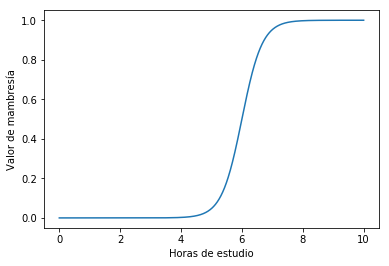

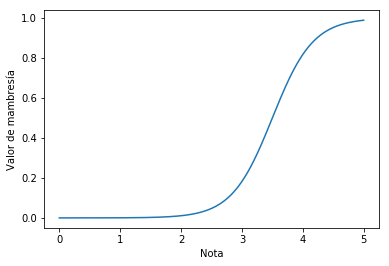

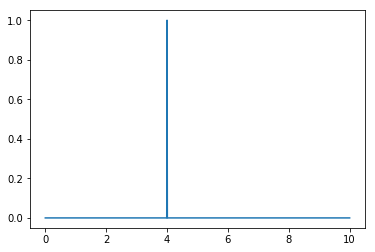

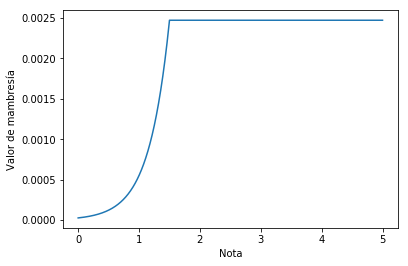

In [0]:
#Conjunto borroso estudiar mucho
X = np.linspace(0,10,1001)
A = fuzz.sigmf(X,6,3)

plt.plot(X,A)
plt.xlabel('Horas de estudio')
plt.ylabel('Valor de mambresía')

#Conjunto borroso excelente estudiante
Y = np.linspace(0,5,1001)
B = fuzz.sigmf(Y,3.5,3)

plt.figure()
plt.plot(Y,B)
plt.xlabel('Nota')
plt.ylabel('Valor de mambresía')

#Producto cartesiano entre A y B
R = np.zeros((1001,1001))

for f in range(1001):
  for c in range(1001):
    R[f][c] = min(A[f],B[c])

AP = np.zeros(1001)
AP[X==4] = 1

plt.figure()
plt.plot(X,AP)
    
#calculo la composición
C = fuzz.maxmin_composition(AP.transpose(),R)[0]

plt.figure()
plt.plot(Y,C)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

print(fuzz.defuzz(Y,C,'centroid'))
print(fuzz.defuzz(Y,C,'bisector'))
print(fuzz.defuzz(Y,C,'mom'))
print(fuzz.defuzz(Y,C,'lom'))
print(fuzz.defuzz(Y,C,'som'))


3.3227314922979603
3.586179745332832
4.750000000000001
5.0
4.5


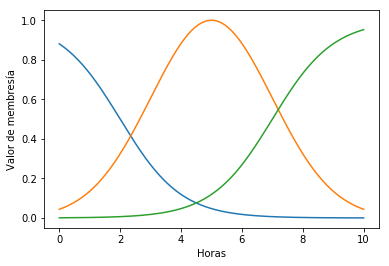

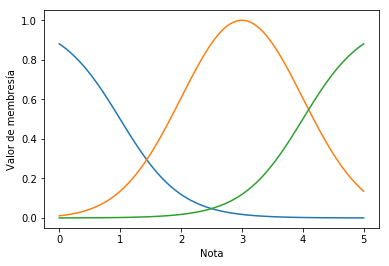

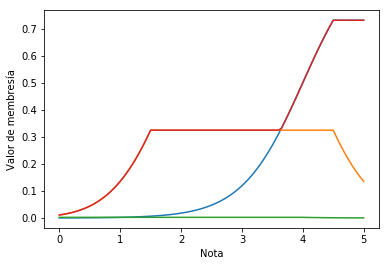

In [0]:
#Para horas de estudio
X = np.linspace(0,10,201)
A1 = fuzz.sigmf(X,2,-1)
A2 = fuzz.gaussmf(X,5,2)
A3 = fuzz.sigmf(X,7,1)

plt.plot(X,A1,X,A2,X,A3)
plt.xlabel('Horas')
plt.ylabel('Valor de membresía')

#Para nota
Y = np.linspace(0,5,101)
B1 = fuzz.sigmf(Y,1,-2)
B2 = fuzz.gaussmf(Y,3,1)
B3 = fuzz.sigmf(Y,4,2)

plt.figure()
plt.plot(Y,B1,Y,B2,Y,B3)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

#Creo las relaciones para cada regla
R1 = np.zeros((X.size,Y.size))
R2 = np.zeros((X.size,Y.size))
R3 = np.zeros((X.size,Y.size))

#Calculo las relaciones por producto cartesiano
for f in range(X.size):
  for c in range(Y.size):
    R1[f][c] = min(A3[f],B3[c])
    R2[f][c] = min(A2[f],B2[c])
    R3[f][c] = min(A1[f],B1[c])

#Construyo el hecho
AP = np.zeros(X.size)
AP[X==8] = 1

#Calculo las composiciones entre AP y las relaciones (Reglas)
C1 = fuzz.maxmin_composition(AP.transpose(),R1)[0]
C2 = fuzz.maxmin_composition(AP.transpose(),R2)[0]
C3 = fuzz.maxmin_composition(AP.transpose(),R3)[0]
#Grafico las composiciones
plt.figure()
plt.plot(Y,C1,Y,C2,Y,C3)
plt.xlabel('Nota')
plt.ylabel('Valor de membresía')

#Calculo la agregación de las reglas con la unión (Máximo)

CT = np.maximum(np.maximum(C1,C2),C3)
plt.plot(Y,CT)

#Desborrosifico el conocimiento inferido
print(fuzz.defuzz(Y,CT,'centroid'))
print(fuzz.defuzz(Y,CT,'bisector'))
print(fuzz.defuzz(Y,CT,'mom'))
print(fuzz.defuzz(Y,CT,'lom'))
print(fuzz.defuzz(Y,CT,'som'))


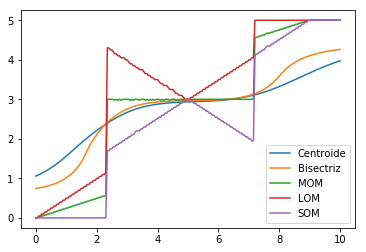

In [0]:
NTC = np.zeros(X.size)
NTB = np.zeros(X.size)
NTM = np.zeros(X.size)
NTL = np.zeros(X.size)
NTS = np.zeros(X.size)

for i in range(X.size):
  #Construyo el hecho
  AP = np.zeros(X.size)
  AP[i] = 1

  #Calculo las composiciones entre AP y las relaciones (Reglas)
  C1 = fuzz.maxmin_composition(AP.transpose(),R1)[0]
  C2 = fuzz.maxmin_composition(AP.transpose(),R2)[0]
  C3 = fuzz.maxmin_composition(AP.transpose(),R3)[0]
  #Calculo la agregación de las reglas con la unión (Máximo)

  CT = np.maximum(np.maximum(C1,C2),C3)
  
  
  #Desborrosifico el conocimiento inferido
  NTC[i] = fuzz.defuzz(Y,CT,'centroid')
  NTB[i] = fuzz.defuzz(Y,CT,'bisector')
  NTM[i] = fuzz.defuzz(Y,CT,'mom')
  NTL[i] = fuzz.defuzz(Y,CT,'lom')
  NTS[i] = fuzz.defuzz(Y,CT,'som')

#Grafico cada método
plt.figure()
plt.plot(X,NTC,X,NTB,X,NTM,X,NTL,X,NTS)
plt.legend(('Centroide','Bisectriz','MOM','LOM','SOM'))

13.229736200904396


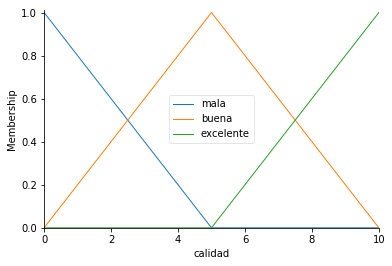

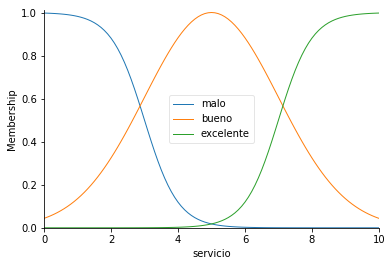

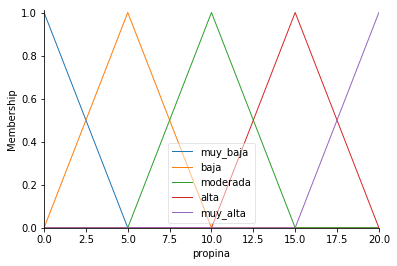

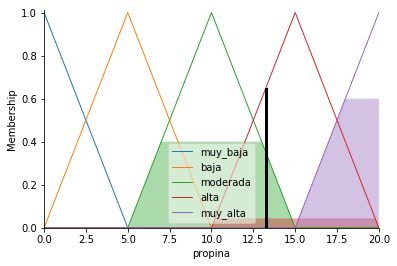

In [0]:
#Sistema de inferencia borroso para la propina
from skfuzzy import control as fis

#Creo los antecedentes
calidad = fis.Antecedent(np.linspace(0,10,101),'calidad')
servicio = fis.Antecedent(np.linspace(0,10,101),'servicio')

#Creo el consecuente
propina = fis.Consequent(np.linspace(0,20,201),'propina')

#Divido el U.D en 3 conjuntos igualmente espaciados
calidad.automf(names=['mala','buena','excelente'])

calidad.view()

#Divido el U.D a mi gusto
servicio['malo'] = fuzz.sigmf(servicio.universe,3,-2)
servicio['bueno'] = fuzz.gaussmf(servicio.universe,5,2)
servicio['excelente'] = fuzz.sigmf(servicio.universe,7,2)

servicio.view()

#Divido el consecuente
propina.automf(names=['muy_baja','baja','moderada','alta','muy_alta'])

propina.view()
#Reglas del sistema & = and, | = or
R1 = fis.Rule(calidad['mala'] & servicio['malo'],propina['muy_baja'])
R2 = fis.Rule(calidad['mala'] & servicio['bueno'],propina['muy_baja'])
R3 = fis.Rule(calidad['mala'] & servicio['excelente'],propina['baja'])
R4 = fis.Rule(calidad['buena'] & servicio['malo'],propina['baja'])
R5 = fis.Rule(calidad['buena'] & servicio['bueno'],propina['moderada'])
R6 = fis.Rule(calidad['buena'] & servicio['excelente'],propina['moderada'])
R7 = fis.Rule(calidad['excelente'] & servicio['malo'],propina['baja'])
R8 = fis.Rule(calidad['excelente'] & servicio['bueno'],propina['alta'])
R9 = fis.Rule(calidad['excelente'] & servicio['excelente'],propina['muy_alta'])

reglas = fis.ControlSystem([R1,R2,R3,R4,R5,R6,R7,R8,R9])
tPropina = fis.ControlSystemSimulation(reglas)

tPropina.input['calidad'] = 8
tPropina.input['servicio'] = 10

tPropina.compute()

print(tPropina.output['propina'])

propina.view(sim=tPropina)



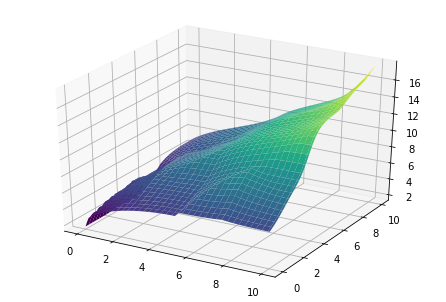

In [0]:
a = np.linspace(0,10,101)
b = np.linspace(0,10,101)

S = np.zeros((a.size,b.size))

for i in range(a.size):
  for j in range(b.size):
    tPropina.input['calidad'] = a[i]
    tPropina.input['servicio'] = b[j]

    tPropina.compute()

    S[i][j] = tPropina.output['propina']

x,y = np.meshgrid(a,b)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,S.transpose(),cmap=cm.viridis)